<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 8</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Scrivere un algoritmo variazionale Monte Carlo per una singola particella in una dimensione soggetta al potenziale
$$V(x) = x^4 - \dfrac{5}{2}x^2$$
che, tramite l'algoritmo di Metropolis, fornisca una funzione d'onda di ground state del tipo
$$\Psi^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}.$$

Utilizzare $\hbar =1$ e $m=1$.
</div>

<div style="font-size: 0.43cm;">
Data una funzione di prova (ossia fissati i parametri $\sigma$ e $\mu$) si vuole calcolarne l'energia media.

Iniziando da una posizione qualsiasi (in cui la funzione d'onda non abbia modulo quadro troppo piccolo), vi si valuta il modulo quadro $|\psi(x)|^2$. Ad ogni passo si propone uno spostamento $\delta$ estratto uniformemente in $[-\Delta/2,\Delta/2]$. Si valuta in questa nuova posizione proposta il modulo quadro della funzione d'onda $|\psi(x+\delta)|^2$.
- Se $|\psi(x+\delta)|^2 \ge |\psi(x)|^2$, lo spostamento proposto viene accettato ($x:=x+\delta$);
- se $|\psi(x+\delta)|^2 < |\psi(x)|^2$, lo spostamento proposto viene accettato con probabilità $\alpha = \dfrac{ |\psi(x+\delta)|^2 }{ |\psi(x)|^2}$.
Una volta accettato (o rigettato) lo spostamento proposto, si eseguono le misure sull'energia cinetica e potenziale nel punto $x$:
    
- $V(x) = x^4 - \dfrac{5}{2}x^2$
- $K(x) = \frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi(x)}{\Psi(x)}$

con derivata seconda:

$$
\frac{\partial^2}{\partial x^2} \Psi(x) = 
e^{ -(\mu+x)^2/(2\sigma^2) }\dfrac{e^{ 2\mu x/\sigma^2 } (\mu-\sigma-x)(\mu+\sigma-x)+(\mu+x)^2-
\sigma^2}{\sigma^4}.
$$
una volta calcolata l'energia come $E=V+K$ si aggiorna l'energia media e si prosegue proponendo un nuovo spostamento $\delta$.

</div>

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Utilizzare il codice prodotto per trovare i parametri che minimizzano l'energia.
</div>

<div style="font-size: 0.43cm;">
Si cerca ora il minimo dell'energia nello spazio bidimensionale dei parametri $\mu$ e $\sigma$.
Si sono effettuate stime di energia per $10\times5$ coppie di parametri. Ogni stima è il risultato di $10^6$ passi divisi in $10^3$ blocchi. Le incertezze sono tutte dell'ordine di $10^{-3}.$
</div>

In [2]:
z_all, err_z, x_all, y_all = np.loadtxt("results/griglia.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

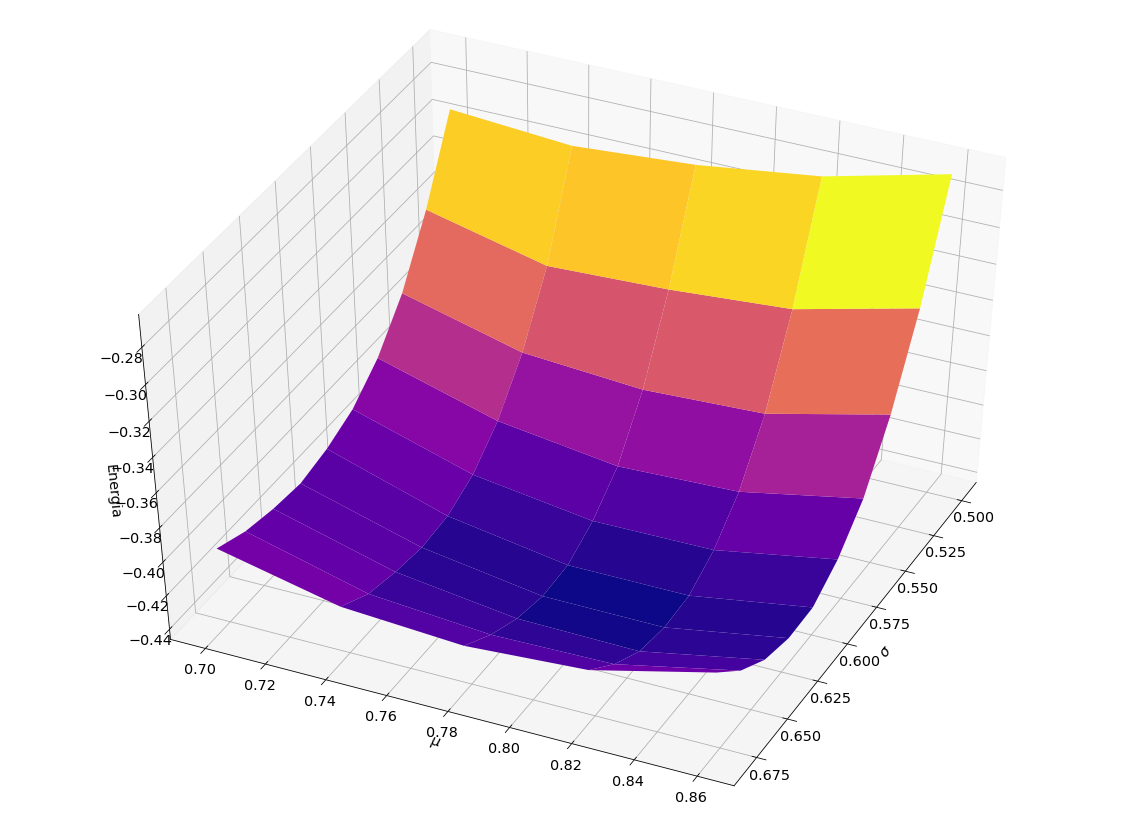

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20,15))

n_x = 10
n_y = 5

x = np.reshape(x_all, (n_y,n_x))
y = np.reshape(y_all, (n_y,n_x))
z = np.reshape(z_all, (n_y,n_x))

surf = ax.plot_surface(x,y,z,cmap="plasma")

ax.view_init(elev=45, azim=25)
ax.set(xlabel=r"$\sigma$")
ax.set(ylabel=r"$\mu$")
ax.set(zlabel="Energia")

plt.show()

<div style="font-size: 0.43cm;">
Nell'area ricercata il minimo si ha per $\sigma = 0.62$ e $\mu = 0.82$.
</div>

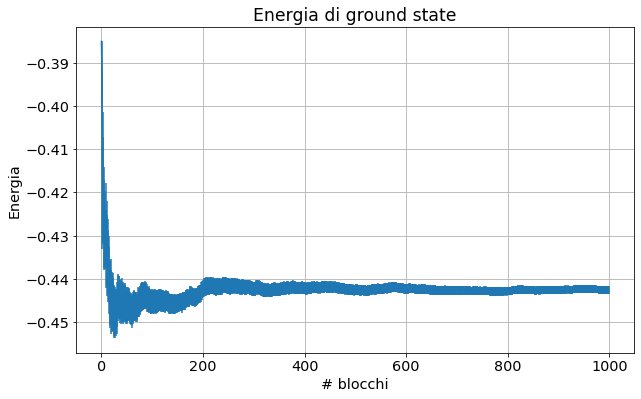

In [4]:
mean, err = np.loadtxt("results/energia.dat", usecols=(0,1), unpack='true')
x = [i for i in range(len(mean))]
plt.errorbar(x,mean,yerr=err)
plt.grid()
plt.title("Energia di ground state")
plt.xlabel("# blocchi")
plt.ylabel("Energia")
plt.show()

<div style="font-size: 0.43cm;">
Presi come parametri $\sigma = 0.62$ e $\mu = 0.82$, si trova la stima dell'energia di ground state $-0.4425\pm0.0009$.
</div>

In [5]:
punti = np.loadtxt("results/punti.dat")

Ground state energy:  -0.46046587969271535


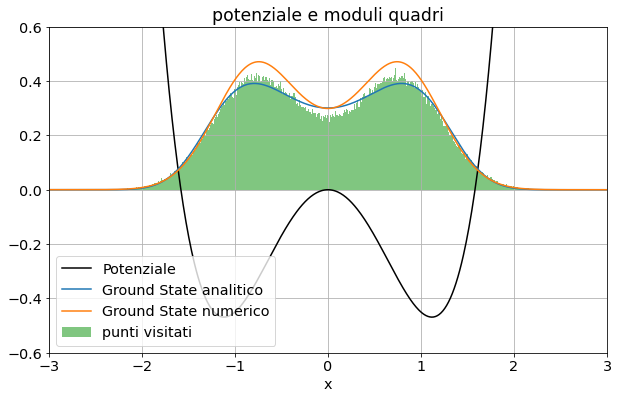

In [6]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

mu = 0.8
sigma = 0.6

gau = 1/(sigma*np.sqrt(2*np.pi)) * (np.exp(-(x-mu)**2/(2*sigma**2)) + np.exp(-(x+mu)**2/(2*sigma**2)))

scale = 0.3

plt.plot(x, scale*V, color="Black", label="Potenziale") # plot the potential
plt.plot(x,(psi[0])**2, label="Ground State analitico")
plt.plot(x,(gau**2), label="Ground State numerico")
plt.hist(punti,500, label="punti visitati", density=True, alpha=0.6)
plt.title("potenziale e moduli quadri")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

<div style="font-size: 0.43cm;">
La stima $-0.4425\pm0.0009$ si discosta dal valore vero -0.4605 principalmente perché si è limitati dall'ansatz sulla forma della funzione d'onda. $-0.4425$ è il minimo che si possa raggiungere utilizzando come funzione d'onda la somma di due gaussiane simmetriche, ma il vero ground state non ha esattamente quella forma.
</div>